In [36]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import utills
%matplotlib inline


In [37]:
np.random.seed(0)

m = 1_000
split_train = int(m * 0.7)
split_val = int(m * 0.15 + split_train)
split_test = int(m * 0.15 + split_val)

X, y = datasets.make_moons(
    n_samples=m, 
    noise=0.1, 
    random_state=0
)

X_train, y_train = X[:split_train], y[:split_train]
X_val, y_val = X[split_train:split_val], y[split_train:split_val]
X_test, y_test = X[split_val:split_test], y[split_val:split_test]

In [38]:
print('Splits:', split_train, split_val, split_test)
print('Lenghths:', len(X_train), len(X_val), len(X_test))

Splits: 700 850 1000
Lenghths: 700 150 150


((1000,), (1000, 2))

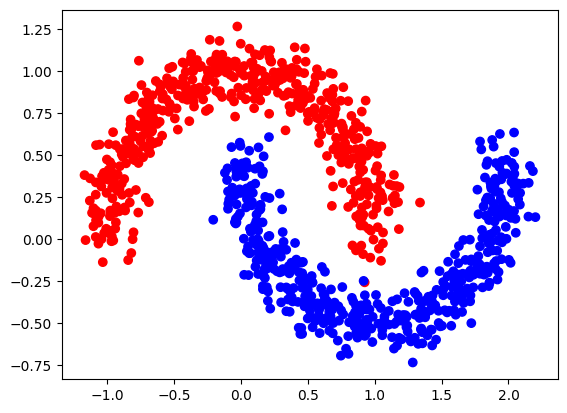

In [39]:
colors = ['blue' if label == 1 else 'red' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

In [40]:
X_train[0], y_train[0]

(array([2.04271531, 0.51812416]), 1)

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [42]:
#tf.get_logger().setLevel('ERROR')

In [43]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

In [44]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_6 (Dense)             (None, 8)                 24        
                                                                 
 dense_7 (Dense)             (None, 10)                90        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [46]:
epochs = 1_000

In [47]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 17.89 seconds.


In [48]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 762us/step - loss: 0.6231 - binary_accuracy: 0.8486


[0.6230617165565491, 0.8485714197158813]

In [49]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 1000us/step - loss: 0.6248 - binary_accuracy: 0.8333


[0.6248153448104858, 0.8333333134651184]

32/32 [==============================] - 0s 742us/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

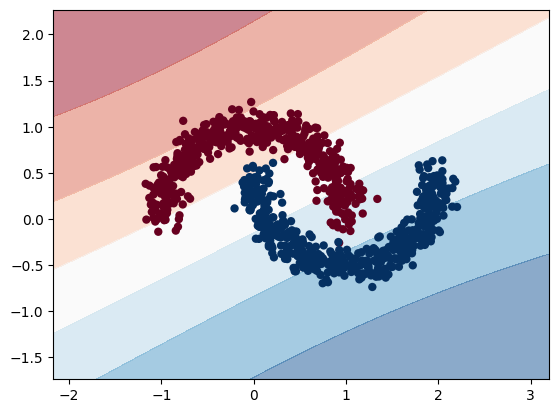

In [50]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

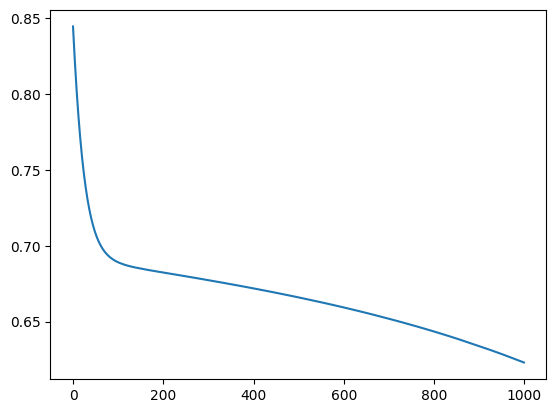

In [51]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [52]:
epochs = 3_000

In [53]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 51.63 seconds.


In [54]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 810us/step - loss: 0.2922 - binary_accuracy: 0.8600


[0.2921822667121887, 0.8600000143051147]

In [55]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 1ms/step - loss: 0.3037 - binary_accuracy: 0.8667


[0.3036958873271942, 0.8666666746139526]

In [ ]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [ ]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

In [ ]:
del model
del history

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
epochs = 1_000

In [ ]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [ ]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_val, y_val)

In [ ]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [ ]:
del model
del history

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
epochs = 1_000

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [ ]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_val, y_val)

In [ ]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [ ]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
utills.plot_decision_boundary(X_test, y_test, model, cmap='RdBu')